# Que 1.
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

No. of multiplications: k.n.m

No. of additions: (k-1).n.m

There are k columns in the first matrix and k rows in second so for each element there will be k multiplications and these k multiplications will result in k numbers which have to be added to get each element of resultant matrix. Thus for each element there will be k-1 additions. Also, there are n.m such elements thus we get our result.

# Que 2.
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Numpy one is faster as it uses in-built vectorised multiplication instead of loop of O(n^2)

In [1]:
# Multiplication of matrices without numpy
import time

n=2
k=3
m=4
A=[[1,2,3],[4,5,6]]
B=[[7,8,9,10],[11,12,13,14],[15,16,17,18]]

start_time=time.time()
C=[]

for i in range(n):
  l=[]
  for j in range(m):
    tmp=0
    for o in range(k):
      tmp+=A[i][o]*B[o][j]
    l.append(tmp)
  C.append(l)

print()
for i in range(len(C)):
  for j in range(len(C[0])):
    print(C[i][j],end=" ")
  print()

end_time=time.time()

print("Time taken without NumPy:", end_time - start_time)


74 80 86 92 
173 188 203 218 
Time taken without NumPy: 0.00869297981262207


In [2]:
# Multiplication of matrices using numpy
import numpy as np
import time

A=np.array(((1,2,3),(4,5,6)))
B=np.array(((7,8,9,10),(11,12,13,14),(15,16,17,18)))
start_time=time.time()

C=A@B

end_time=time.time()

for i in range(len(C)):
  for j in range(len(C[0])):
    print(C[i][j],end=" ")
  print()

print("Time taken with NumPy:", end_time - start_time)

74 80 86 92 
173 188 203 218 
Time taken with NumPy: 0.0023593902587890625


# Que 3.
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [4]:
import numpy as np
import time

# Brute force
def median(arr):
  n=len(arr)
  if (n%2==1):
    for i in range(n//2+1):
      tmp_max=arr[0]
      for j in range(n-i):
        if (arr[j]>tmp_max):
          tmp_max=arr[j]
      arr[j]=arr[n-i-1]
      arr[n-i-1]=tmp_max
    return arr[n//2]
  else:
    for i in range(n//2+1):
      tmp_max=arr[0]
      for j in range(n-i):
        if (arr[j]>tmp_max):
          tmp_max=arr[j]
      arr[j]=arr[n-i-1]
      arr[n-i-1]=tmp_max
    return (arr[n//2]+arr[n//2-1])/2



# Sort and find
def find_median(arr):
    n=len(arr)
    sorted_arr=sorted(arr)
    if n%2==1:
        return sorted_arr[n//2]
    else:
        return (sorted_arr[n//2-1]+sorted_arr[n//2])/2


# Timing the functions
def time_function(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return result, end_time - start_time

# Create a random array with larger size
arr = np.random.randint(0, 100, size=10000).tolist()

# Test Method I
median_I, time_I = time_function(median, arr)
print("Median:", median_I)
print("Time taken by Method I:", time_I)
print()

# Test Method II
median_II, time_II = time_function(find_median, arr)
print("Median:", median_II)
print("Time taken by Method II:", time_II)
print()

# Test NumPy Median
start_time = time.time()
median_numpy = np.median(arr)
end_time = time.time()
time_numpy = end_time - start_time
print("NumPy Median:", median_numpy)
print("Time taken by NumPy:", time_numpy)


Median: 99.0
Time taken by Method I: 4.404031753540039

Median: 99.0
Time taken by Method II: 0.0007569789886474609

NumPy Median: 99.0
Time taken by NumPy: 0.004236698150634766


# Que 4.
What is the gradient of the following function with respect to x and y?
        
        x^2*y + y^3*sin(x)

δf/δx = 2xy + y^3*cos(x)

δf/δy = x^2 + 3y^2*sin(x)


In [15]:
import jax.numpy as jnp
from jax import grad

def f(x, y):
    return (x**2)*y+(y**3)*jnp.sin(x)

# Gradients with respect to x and y
grad_f_x = grad(f, argnums=0)
grad_f_y = grad(f, argnums=1)

x_val = 1.0
y_val = 2.0

grad_x_val = grad_f_x(x_val, y_val)
grad_y_val = grad_f_y(x_val, y_val)

print(f"Gradient with respect to x (at x={x_val}, y={y_val}): {grad_x_val}")
print(f"Gradient with respect to y (at x={x_val}, y={y_val}): {grad_y_val}")


x_val = 0.0
y_val = 3.0

grad_x_val = grad_f_x(x_val, y_val)
grad_y_val = grad_f_y(x_val, y_val)

print(f"Gradient with respect to x (at x={x_val}, y={y_val}): {grad_x_val}")
print(f"Gradient with respect to y (at x={x_val}, y={y_val}): {grad_y_val}")


Gradient with respect to x (at x=1.0, y=2.0): 8.322418212890625
Gradient with respect to y (at x=1.0, y=2.0): 11.097651481628418
Gradient with respect to x (at x=0.0, y=3.0): 27.0
Gradient with respect to y (at x=0.0, y=3.0): 0.0


In [16]:
from sympy import symbols, diff, sin, cos

x, y = symbols('x y')
f = x**2*y+y**3*sin(x)

df_dx = diff(f, x)
df_dy = diff(f, y)

df_dx, df_dy

(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

# Que 7.
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [17]:
records={
    2022:{
        'Branch 1':{
            'Roll Number': 1, 'Name': 'Anurag', 'Marks':{
                'Maths':100, 'English':70}},
        'Branch 2':{
            'Roll Number': 2, 'Name': 'Aditya', 'Marks':{
                'Maths':85, 'English':75}}},
    2023:{
        'Branch 1':{
            'Roll Number': 3, 'Name': 'Arjun', 'Marks':{
                'Maths':90, 'English':80}},
        'Branch 2':{
            'Roll Number': 4, 'Name': 'Abhi', 'Marks':{
                'Maths':80, 'English':95}}},
    2024:{
        'Branch 1':{
            'Roll Number': 5, 'Name': 'Atul', 'Marks':{
                'Maths':100, 'English':70}},
        'Branch 2':{
            'Roll Number': 6, 'Name': 'Aryan', 'Marks':{
                'Maths':85, 'English':75}}},
    2025:{
        'Branch 1':{
            'Roll Number': 7, 'Name': 'Arnav', 'Marks':{
                'Maths':100, 'English':78}},
        'Branch 2':{
            'Roll Number': 8, 'Name': 'Avi', 'Marks':{
                'Maths':85, 'English':90}}}
    }

# Que 8.
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [ ]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"\n \t \t \t Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f" \n \t \t{self.name} Students: {self.students}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"\n \t {self.year} {self.branches}"

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database  {self.years}"

database = Database()

# Adding data for 2022
year_2022 = Year(2022)
branch_1_2022 = Branch("Branch 1")
branch_1_2022.add_student(Student(1, "Anurag", {"Maths": 100, "English": 70}))
year_2022.add_branch(branch_1_2022)

branch_2_2022 = Branch("Branch 2")
branch_2_2022.add_student(Student(2, "Aditya", {"Maths": 85, "English": 75}))
year_2022.add_branch(branch_2_2022)

database.add_year(year_2022)

# Adding data for 2023
year_2023 = Year(2023)
branch_1_2023 = Branch("Branch 1")
branch_1_2023.add_student(Student(3, "Arjun", {"Maths": 88, "English": 77}))
year_2023.add_branch(branch_1_2023)

branch_2_2023 = Branch("Branch 2")
branch_2_2023.add_student(Student(4, "Harry", {"Maths": 92, "English": 82}))
year_2023.add_branch(branch_2_2023)

database.add_year(year_2023)

# Adding data for 2024
year_2024 = Year(2024)
branch_1_2024 = Branch("Branch 1")
branch_1_2024.add_student(Student(5, "Hope", {"Maths": 87, "English": 78}))
year_2024.add_branch(branch_1_2024)

branch_2_2024 = Branch("Branch 2")
branch_2_2024.add_student(Student(6, "Alex", {"Maths": 89, "English": 79}))
year_2024.add_branch(branch_2_2024)

database.add_year(year_2024)

# Adding data for 2025
year_2025 = Year(2025)
branch_1_2025 = Branch("Branch 1")
branch_1_2025.add_student(Student(7, "Rock", {"Maths": 91, "English": 81}))
year_2025.add_branch(branch_1_2025)

branch_2_2025 = Branch("Branch 2")
branch_2_2025.add_student(Student(8, "Zebra", {"Maths": 93, "English": 83}))
year_2025.add_branch(branch_2_2025)

database.add_year(year_2025)

# Printing the database
print(database)


Database  [
 	 2022 [ 
 	 	Branch 1 Students: [
 	 	 	 Roll Number: 1, Name: Anurag, Marks: {'Maths': 100, 'English': 70}],  
 	 	Branch 2 Students: [
 	 	 	 Roll Number: 2, Name: Aditya, Marks: {'Maths': 85, 'English': 75}]], 
 	 2023 [ 
 	 	Branch 1 Students: [
 	 	 	 Roll Number: 3, Name: Arjun, Marks: {'Maths': 88, 'English': 77}],  
 	 	Branch 2 Students: [
 	 	 	 Roll Number: 4, Name: Harry, Marks: {'Maths': 92, 'English': 82}]], 
 	 2024 [ 
 	 	Branch 1 Students: [
 	 	 	 Roll Number: 5, Name: Hope, Marks: {'Maths': 87, 'English': 78}],  
 	 	Branch 2 Students: [
 	 	 	 Roll Number: 6, Name: Alex, Marks: {'Maths': 89, 'English': 79}]], 
 	 2025 [ 
 	 	Branch 1 Students: [
 	 	 	 Roll Number: 7, Name: Rock, Marks: {'Maths': 91, 'English': 81}],  
 	 	Branch 2 Students: [
 	 	 	 Roll Number: 8, Name: Zebra, Marks: {'Maths': 93, 'English': 83}]]]


# Que 9.
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

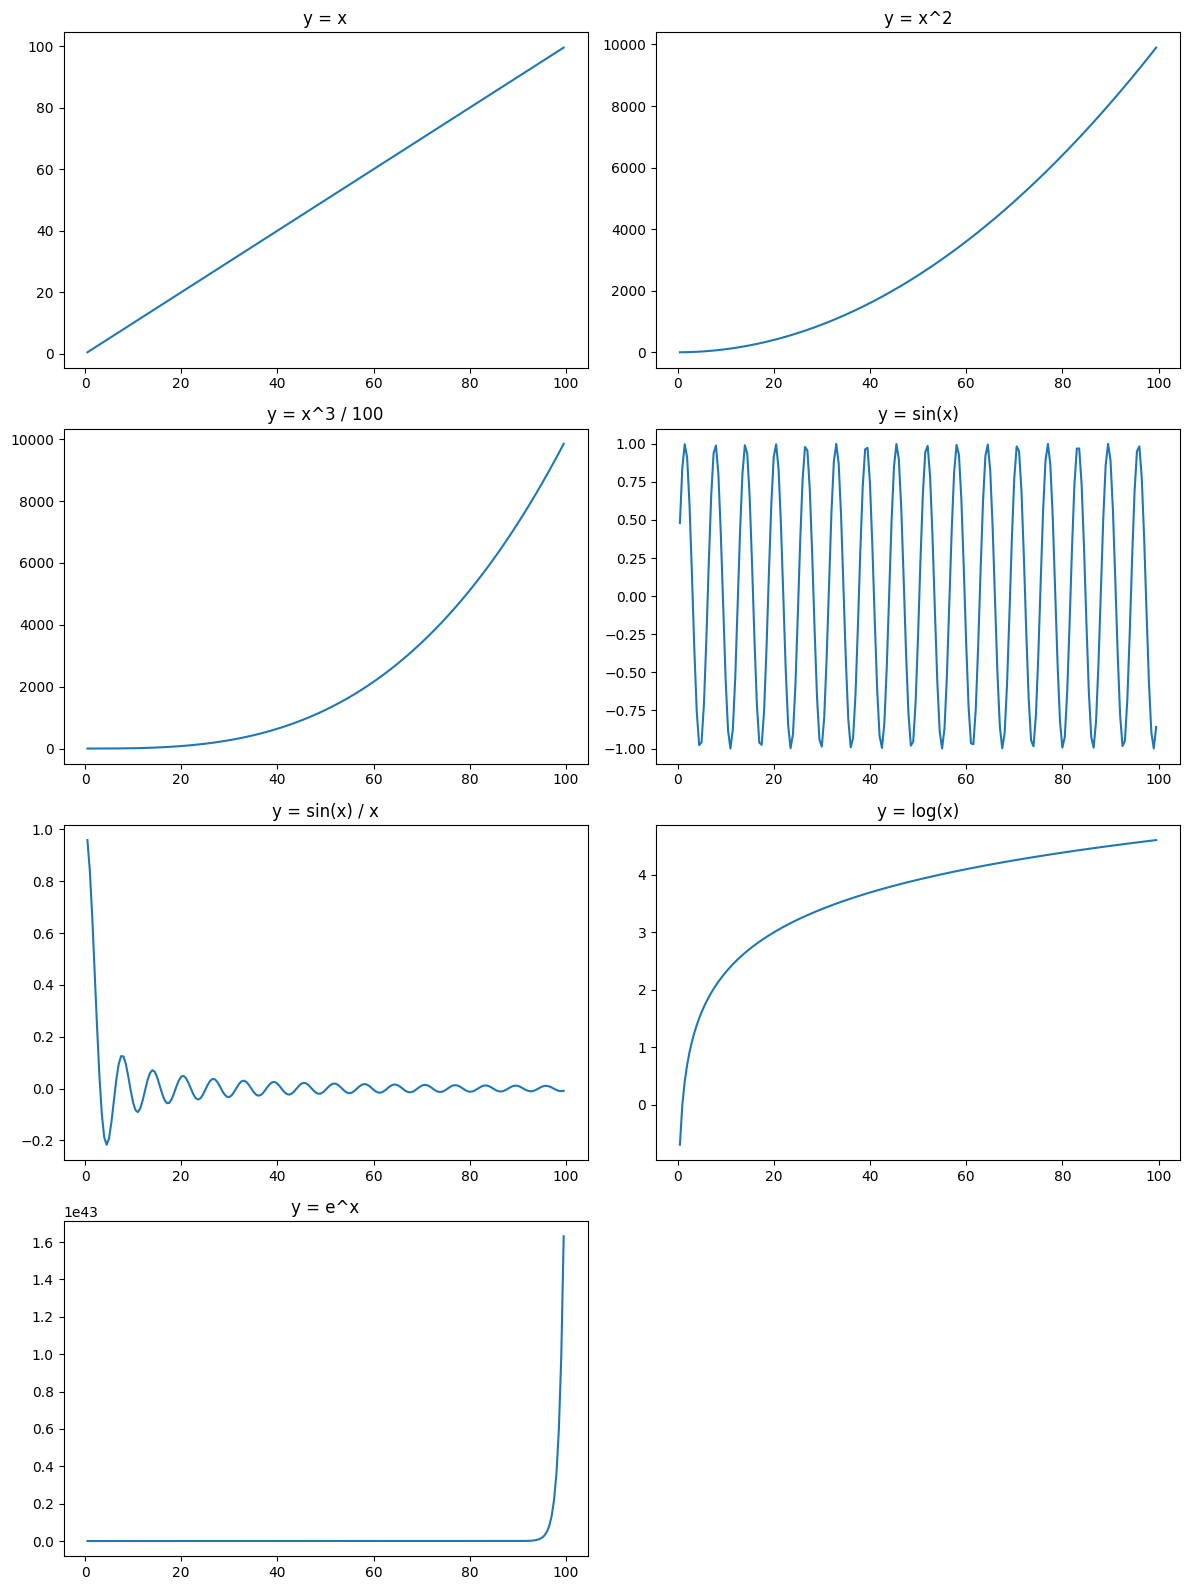

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range for x
x = np.arange(0.5, 100.0, 0.5)

# Define the functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Plot y = x
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('y = x')

# Plot y = x^2
axs[0, 1].plot(x, y2)
axs[0, 1].set_title('y = x^2')

# Plot y = x^3 / 100
axs[1, 0].plot(x, y3)
axs[1, 0].set_title('y = x^3 / 100')

# Plot y = sin(x)
axs[1, 1].plot(x, y4)
axs[1, 1].set_title('y = sin(x)')

# Plot y = sin(x) / x
axs[2, 0].plot(x, y5)
axs[2, 0].set_title('y = sin(x) / x')

# Plot y = log(x)
axs[2, 1].plot(x, y6)
axs[2, 1].set_title('y = log(x)')

# Plot y = e^x
axs[3, 0].plot(x, y7)
axs[3, 0].set_title('y = e^x')

# Remove the unused subplot
fig.delaxes(axs[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Que 10.
Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.


In [18]:
import numpy as np
import pandas as pd

mat = np.random.rand(20, 5)+1
df=pd.DataFrame(mat,columns=['a','b','c','d','e'])

max_std=df.std().sort_values(ascending=False).index[0]
print("Column with highest standard deviation is: ", max_std)

min_mean=df.mean(axis=1).sort_values(ascending=True).index[0]
print("Row with lowest standard deviation is: ", min_mean)


Column with highest standard deviation is:  c
Row with lowest standard deviation is:  14


# Que 11.
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively

In [19]:
df['f']=df.sum(axis=1)
display(df)

df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')
display(df)

,a,b,c,d,e,f
0,1.186302,1.887113,1.877073,1.469586,1.412594,7.832669
1,1.926758,1.725419,1.449213,1.379360,1.401019,7.881770
2,1.099652,1.200460,1.948839,1.829501,1.956631,8.035083
3,1.581628,1.410983,1.880446,1.920766,1.649076,8.442899
4,1.865359,1.560237,1.569298,1.031087,1.852233,7.878213
5,1.865721,1.745474,1.989165,1.896873,1.683556,9.180789
6,1.818555,1.370147,1.791756,1.621824,1.641475,8.243757
7,1.846711,1.993075,1.299551,1.081143,1.665705,7.886184
8,1.229758,1.422113,1.828029,1.600506,1.212156,7.292562
9,1.800398,1.302944,1.404779,1.179053,1.925088,7.612261


,a,b,c,d,e,f,g
0,1.186302,1.887113,1.877073,1.469586,1.412594,7.832669,LT8
1,1.926758,1.725419,1.449213,1.379360,1.401019,7.881770,LT8
2,1.099652,1.200460,1.948839,1.829501,1.956631,8.035083,GT8
3,1.581628,1.410983,1.880446,1.920766,1.649076,8.442899,GT8
4,1.865359,1.560237,1.569298,1.031087,1.852233,7.878213,LT8
5,1.865721,1.745474,1.989165,1.896873,1.683556,9.180789,GT8
6,1.818555,1.370147,1.791756,1.621824,1.641475,8.243757,GT8
7,1.846711,1.993075,1.299551,1.081143,1.665705,7.886184,LT8
8,1.229758,1.422113,1.828029,1.600506,1.212156,7.292562,LT8
9,1.800398,1.302944,1.404779,1.179053,1.925088,7.612261,LT8


# Que 12.
Write a small piece of code to explain broadcasting in numpy.

In [21]:
import numpy as np

a = np.array([0,1,-1])
b = np.array([[4],[3],[2]])

print("Array a:")
print(a)
print("Shape of a:", a.shape)
print()

print("Array b:")
print(b)
print("Shape of b:", b.shape)
print()

# Perform broadcasting to add a and b
result = a + b

print("Result of a + b:")
print(result)
print("Shape of result:", result.shape)


Array a:
[ 0  1 -1]
Shape of a: (3,)

Array b:
[[4]
 [3]
 [2]]
Shape of b: (3, 1)

Result of a + b:
[[4 5 3]
 [3 4 2]
 [2 3 1]]
Shape of result: (3, 3)


# Que 13.
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [20]:
def get_argmin(arr):
   if arr.size == 0:
        return ("Array is empty")
   mini = 0
   for i in range(1, len(arr)):
       if arr[i] < arr[mini]:
           mini = i

   return mini

arr = np.array([5, 2, 9, 1, 7])
my_argmin = get_argmin(arr)
numpy_argmin = np.argmin(arr)

print("My argmin: ", my_argmin)
print("NumPy argmin: ", numpy_argmin)

My argmin:  3
NumPy argmin:  3
